# Análise de Risco de Contribuintes utilizando Modelo Oculto de Markov (HMM)
### Trabalho de Conclusão de Curso do Curso de Pós-graduação em Ciência de Dados e Big Data - PUCMINAS <br> Autor: Miguel Castro dos Santos Junior

### ANÁLISE DE DIVERSOS MODELOS USANDO PYCARET

In [1]:
# Importar bibliotecas
from pycaret.utils import version
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#limite de colunas para impressão apenas, substituir por None para remover limite
pd.set_option('max_columns', 10)

In [2]:
# Importa base de dados para análise
dfc4 = pd.read_pickle(r'C:\Users\49026461534\Documents\_Pos Big Data\TCC\dfc4.pkl')

In [3]:
dfc4.head()

,CNPJ8,situacao,data_situacao,motivo_situacao,capital_social,...,VALOR,acumulado,score,estados,n_estados
0,00002121,2,2018-10-15,0,580000000.0,...,554594.72,36481198.84,1650,"[1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3]",11
1,00056535,8,2008-12-31,71,0.0,...,152948.35,566581.47,650,"[1, 1, 1, 1]",4
2,00057284,2,2005-11-03,0,0.0,...,295.00,61569.14,450,"[0, 0, 0, 1]",4
3,00059015,2,2005-11-03,0,2000000.0,...,10195.56,13015.44,459,"[1, 0, 0, 0]",4
4,00059966,4,2018-10-25,63,6000000.0,...,3447.42,74775.28,454,"[0, 0, 0, 5]",4


In [4]:
#selecionar colunas de entrada e saída
columns = ["situacao", "capital_social", "porte", "acumulado", "n_estados", "classe"]
data = dfc4[:][columns]
data.head()

,situacao,capital_social,porte,acumulado,n_estados,classe
0,2,580000000.0,5,36481198.84,11,3
1,8,0.0,5,566581.47,4,1
2,2,0.0,1,61569.14,4,1
3,2,2000000.0,3,13015.44,4,0
4,4,6000000.0,3,74775.28,4,5


In [5]:
#Escolhe variável para predição
from pycaret.classification import *
clf1 = setup(data, target = 'classe', session_id=123, log_experiment=True, experiment_name='classe1')

,Description,Value
0,session_id,123
1,Target,classe
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(16939, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# Compara modelos de ML
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7554,0.9133,0.6775,0.7539,0.7510,0.6097,0.6117,2.2770
lightgbm,Light Gradient Boosting Machine,0.7500,0.9113,0.6995,0.7495,0.7471,0.6028,0.6043,0.3110
knn,K Neighbors Classifier,0.7046,0.8022,0.5807,0.6478,0.6680,0.5057,0.5144,0.1160
rf,Random Forest Classifier,0.6969,0.8808,0.5821,0.6979,0.6962,0.5119,0.5122,0.4620
dt,Decision Tree Classifier,0.6882,0.7514,0.6506,0.6881,0.6879,0.5034,0.5035,0.0400
et,Extra Trees Classifier,0.6723,0.8443,0.5119,0.6695,0.6702,0.4719,0.4722,0.5090
lda,Linear Discriminant Analysis,0.5684,0.7101,0.2863,0.4290,0.4662,0.1308,0.1768,0.0430
ridge,Ridge Classifier,0.5645,0.0000,0.1903,0.4120,0.4263,0.0491,0.1081,0.0300
nb,Naive Bayes,0.4032,0.8007,0.2962,0.6193,0.3826,0.1883,0.2299,0.0210
ada,Ada Boost Classifier,0.3565,0.6369,0.4350,0.4872,0.3165,0.1682,0.2032,0.1680


In [7]:
#Cria modelo GBC
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7648,0.9188,0.6708,0.7594,0.7577,0.6214,0.6234
1,0.7428,0.9112,0.6676,0.7408,0.7387,0.5881,0.5897
2,0.7546,0.9050,0.6920,0.7521,0.7500,0.6087,0.6106
3,0.7411,0.9054,0.6313,0.7426,0.7380,0.5889,0.5910
4,0.7690,0.9266,0.6555,0.7698,0.7670,0.6323,0.6336
5,0.7639,0.9170,0.7304,0.7643,0.7605,0.6254,0.6272
6,0.7614,0.9106,0.7222,0.7578,0.7563,0.6189,0.6205
7,0.7570,0.9152,0.6420,0.7520,0.7498,0.6051,0.6075
8,0.7705,0.9234,0.7001,0.7652,0.7635,0.6335,0.6355
9,0.7291,0.9003,0.6627,0.7354,0.7285,0.5751,0.5777


In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7099,0.8848,0.5618,0.7089,0.7080,0.5314,0.5316
1,0.6889,0.8787,0.5848,0.6951,0.6912,0.5022,0.5024
2,0.6796,0.8701,0.5835,0.6858,0.6814,0.4872,0.4875
3,0.7015,0.8838,0.5822,0.7042,0.7014,0.5188,0.5190
4,0.7074,0.8962,0.5396,0.7059,0.7058,0.5291,0.5293
5,0.6889,0.8791,0.5669,0.6895,0.6881,0.4991,0.4994
6,0.6956,0.8748,0.6035,0.6921,0.6929,0.5062,0.5067
7,0.7122,0.8762,0.5849,0.7106,0.7099,0.5320,0.5325
8,0.6979,0.8810,0.6538,0.7000,0.6975,0.5143,0.5145
9,0.6869,0.8830,0.5604,0.6870,0.6859,0.4989,0.4990


In [9]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [10]:
print (best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [11]:
#Otimiza modelo GBC
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7352,0.9124,0.5025,0.7182,0.7141,0.5462,0.5556
1,0.7218,0.9033,0.5107,0.7054,0.7049,0.5329,0.5382
2,0.7201,0.8959,0.4824,0.6921,0.6967,0.5234,0.5311
3,0.7277,0.8993,0.4985,0.7151,0.7107,0.5428,0.5484
4,0.7420,0.9216,0.5049,0.7215,0.7202,0.5558,0.5666
5,0.7319,0.9116,0.5310,0.7245,0.7116,0.5417,0.5511
6,0.7268,0.9033,0.4899,0.7024,0.7048,0.5351,0.5429
7,0.7207,0.9048,0.5031,0.7010,0.6980,0.5199,0.5293
8,0.7477,0.9171,0.5367,0.7384,0.7261,0.5694,0.5787
9,0.7038,0.8931,0.4734,0.6877,0.6889,0.5070,0.5106


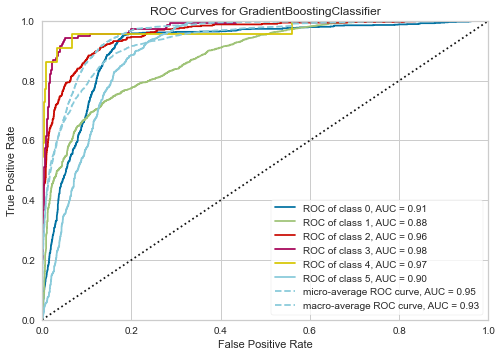

In [12]:
plot_model(tuned_gbc)

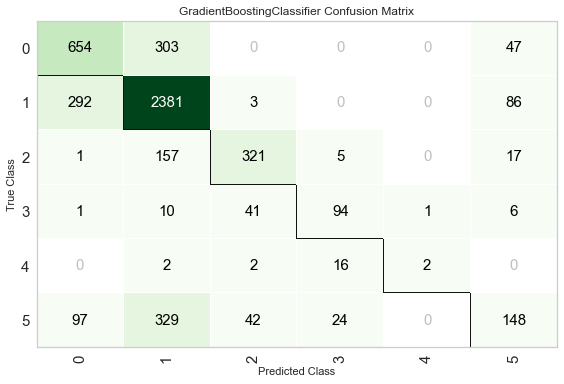

In [15]:
# Mostra heatmap da matriz de confusão para o modelo GBC
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [ ]:
pred_unseen_gbc = predict_model(gbc)
results_unseen_gbc = pull()

In [ ]:
pred_unseen_gbc.head(15)[['classe', 'Label', 'Score']]

In [ ]:
plot_model(best_model, plot = 'error')

In [ ]:
interpret_model(rf)